In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
tf.__version__


'2.9.1'

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('C:\\Users\\Saurav\\OneDrive\\Desktop\\minor_project\\yawn_dataset\\train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary',
                                                 color_mode='grayscale')

Found 605 images belonging to 2 classes.


In [3]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('C:\\Users\\Saurav\\OneDrive\\Desktop\\minor_project\\yawn_dataset\\test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary',
                                            color_mode='grayscale')

Found 94 images belonging to 2 classes.


In [4]:
cnn = tf.keras.models.Sequential()

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=64 , kernel_size=3, activation='relu', input_shape=[64, 64, 1]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


In [6]:
cnn.add(tf.keras.layers.Flatten())

In [7]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [8]:
cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))

In [9]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [10]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [11]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [12]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [13]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [14]:
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
19/19 [==============================] - 13s 631ms/step - loss: 0.6961 - accuracy: 0.5322 - val_loss: 0.6805 - val_accuracy: 0.7021
Epoch 2/25
19/19 [==============================] - 6s 310ms/step - loss: 0.6465 - accuracy: 0.6463 - val_loss: 0.4607 - val_accuracy: 0.7872
Epoch 3/25
19/19 [==============================] - 5s 256ms/step - loss: 0.5205 - accuracy: 0.7455 - val_loss: 0.4043 - val_accuracy: 0.8511
Epoch 4/25
19/19 [==============================] - 5s 244ms/step - loss: 0.4068 - accuracy: 0.8248 - val_loss: 0.2452 - val_accuracy: 0.8830
Epoch 5/25
19/19 [==============================] - 5s 250ms/step - loss: 0.3646 - accuracy: 0.8463 - val_loss: 0.2483 - val_accuracy: 0.8723
Epoch 6/25
19/19 [==============================] - 4s 229ms/step - loss: 0.3338 - accuracy: 0.8727 - val_loss: 0.3392 - val_accuracy: 0.8511
Epoch 7/25
19/19 [==============================] - 5s 261ms/step - loss: 0.3265 - accuracy: 0.8595 - val_loss: 0.1647 - val_accuracy: 0.9468
Epoch

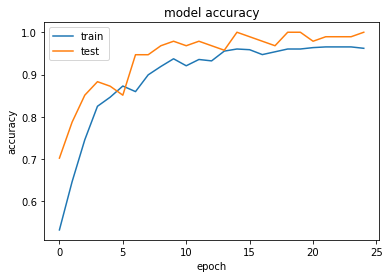

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

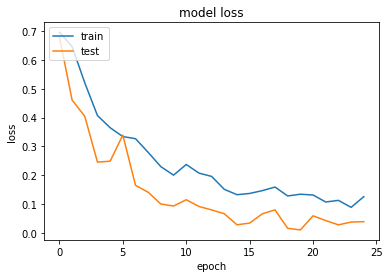

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:

tf.keras.utils.plot_model(cnn, to_file='cnny_model.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [56]:
import cv2
import numpy as np
img = cv2.imread('C:\project\yawn.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face = cv2.CascadeClassifier('C:\Minorproject\DrowsinessDetection\haar cascade files\haarcascade_frontalface_alt.xml')
faces = face.detectMultiScale(img,minNeighbors=5,scaleFactor=1.05,minSize=(10,10))
for (x, y, w, h) in faces:
    img = img[y:y+h, x:x+w]
img = cv2.resize(img, (64, 64))
img = img/255
img = img.reshape(64, 64, 1)
img = np.expand_dims(img, axis = 0)
predict_r=cnn.predict(img)
rpred = predict_r[0][0]
print(rpred)



0.9923463


In [18]:
cnn.save('C:\\Users\\Saurav\\OneDrive\\Desktop\\minor_project\\DrowsinessDetection\\models\\yawnmodel.h5', overwrite= True)